# Automating Crypto Website API Pull Project

In [14]:
# Requesting data from the CoinMarketCap API

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1b571db1-0308-4c59-8ea6-68044884541d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(json.dumps(list(data.keys()), indent=2))
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

[
  "status",
  "data"
]


In [16]:
import pandas as pd

In [18]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983367e+07,1.983367e+07,False,NaN,1,NaN,NaN,None,2025-03-07T23:37:00.000Z,86414.955251,6.672693e+10,37.7256,0.320191,-4.514415,2.759617,-10.466985,-15.394306,-13.730439,1.713926e+12,60.3560,1.814714e+12,None,2025-03-07T23:37:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205974e+08,1.205974e+08,True,NaN,2,NaN,NaN,None,2025-03-07T23:36:00.000Z,2132.599732,2.283966e+10,15.4650,-0.003500,-3.568456,-4.284321,-23.045249,-42.039943,-46.864554,2.571860e+11,9.0585,2.571860e+11,None,2025-03-07T23:36:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.427998e+11,1.445563e+11,True,NaN,3,NaN,NaN,None,2025-03-07T23:36:00.000Z,0.999648,1.113218e+11,26.9263,-0.002329,-0.031105,0.031217,-0.042280,-0.097331,-0.120495,1.427495e+11,5.0279,1.445054e+11,None,2025-03-07T23:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.804330e+10,9.998637e+10,False,NaN,4,NaN,NaN,None,2025-03-07T23:36:00.000Z,2.367994,9.755755e+09,41.3788,-0.328549,-9.169440,10.520900,-0.321342,-1.962594,-8.463292,1.374462e+11,4.8411,2.367994e+11,None,2025-03-07T23:36:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424755e+08,1.424755e+08,False,NaN,5,NaN,NaN,None,2025-03-07T23:37:00.000Z,591.854672,1.865979e+09,14.5599,-0.211396,-1.028345,0.938876,4.294349,-19.066278,-21.508024,8.432481e+10,2.9689,8.432481e+10,None,2025-03-07T23:37:00.000Z,NaN,NaN,NaN,NaN,NaN
5,5426,Solana,SOL,solana,848,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.087054e+08,5.955865e+08,True,NaN,6,NaN,NaN,None,2025-03-07T23:37:00.000Z,138.340118,6.072983e+09,44.2837,-2.136315,-4.235721,-6.420448,-29.331846,-36.575086,-42.348046,7.037437e+10,2.4777,8.239350e+10,None,2025-03-07T23:37:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,26090,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.814024e+10,5.814024e+10,False,NaN,7,NaN,NaN,None,2025-03-07T23:36:00.000Z,0.999945,1.256073e+10,22.5169,0.004099,0.002093,0.019547,-0.009667,-0.025972,0.002192,5.813703e+10,2.0470,5.813703e+10,None,2025-03-07T23:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1174,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.483351e+11,1.483351e+11,True,NaN,8,NaN,NaN,None,2025-03-07T23:37:00.000Z,0.197149,1.828821e+09,1.3640,-1.153810,-2.932544,-2.190651,-22.769919,-49.006916,-56.821456,2.924406e+10,1.0298,2.924406e+10,None,2025-03-07T23:37:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1476,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.522421e+10,4.499491e+10,False,NaN,9,NaN,NaN,None,2025-03-07T23:37:00.000Z,0.812815,3.469094e+09,31.4488,-0.254973,-10.952382,28.385866,11.124300,-25.637293,-33.027287,2.863075e+10,1.0080,3.657665e+10,None,2025

In [22]:
import os
from time import time
from time import sleep

In [26]:
# Script to automate data pull from the API

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1b571db1-0308-4c59-8ea6-68044884541d',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    api_df = pd.json_normalize(data['data'])
    api_df['timestamp'] = pd.Timestamp.now() # adding 'timestamp' column to specify the time data was pulled

    # Creating or appending the data pulled to csv file 
    if not os.path.isfile(r'G:\Data Analytics Projects\Python Data Anlaytics Projects\Automating Crypto Website API Pull Data Analytics Python Project (via Alex The Analyst)\Crypto API.csv'):
        api_df.to_csv(r'G:\Data Analytics Projects\Python Data Anlaytics Projects\Automating Crypto Website API Pull Data Analytics Python Project (via Alex The Analyst)\Crypto API.csv', header=True)
    else:
        api_df.to_csv(r'G:\Data Analytics Projects\Python Data Anlaytics Projects\Automating Crypto Website API Pull Data Analytics Python Project (via Alex The Analyst)\Crypto API.csv', mode='a', header=False)

In [28]:
# Loop to automatically run the script

for i in range(300):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # waits 1 minute

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [36]:
# Reading data from csv

df = pd.read_csv(r'G:\Data Analytics Projects\Python Data Anlaytics Projects\Automating Crypto Website API Pull Data Analytics Python Project (via Alex The Analyst)\Crypto API.csv')
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.983367e+07,1.983367e+07,False,NaN,1,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,86450.889934,6.677438e+10,37.4132,0.170689,-4.514625,2.690903,-10.358115,-15.367854,-13.642356,1.714638e+12,60.3811,1.815469e+12,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
1,1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205974e+08,1.205974e+08,True,NaN,2,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,2130.688624,2.291339e+10,20.0522,-0.493352,-3.666422,-4.591881,-23.307516,-42.123651,-46.865041,2.569555e+11,9.0467,2.569555e+11,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
2,2,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.427998e+11,1.445563e+11,True,NaN,3,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,0.999575,1.113394e+11,26.9554,-0.035788,-0.047817,0.015110,-0.040318,-0.093624,-0.127656,1.427391e+11,5.0255,1.444949e+11,NaN,2025-03-07T23:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-08 01:41:13.781829
3,3,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.804330e+10,9.998637e+10,False,NaN,4,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,2.367014,9.760163e+09,41.3315,-0.376915,-9.340563,10.393649,-0.613181,-2.032481,-8.700371,1.373893e+11,4.8371,2.367014e+11,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
4,4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424755e+08,1.424755e+08,False,NaN,5,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,591.840261,1.864850e+09,14.5168,-0.266139,-1.032709,0.900556,4.100041,-19.028981,-21.455030,8.432276e+10,2.9711,8.432276e+10,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829


In [38]:
# Converting scientific notation values to floats
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19833668.00000,19833668.00000,False,NaN,1,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,86450.88993,66774378959.22477,37.41320,0.17069,-4.51463,2.69090,-10.35812,-15.36785,-13.64236,1714638249263.55078,60.38110,1815468688622.53003,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
1,1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120597393.23725,120597393.23725,True,NaN,2,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,2130.68862,22913390567.69129,20.05220,-0.49335,-3.66642,-4.59188,-23.30752,-42.12365,-46.86504,256955493844.20169,9.04670,256955493844.20001,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
2,2,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,142799794449.01764,144556334099.41824,True,NaN,3,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,0.99957,111339426456.29152,26.95540,-0.03579,-0.04782,0.01511,-0.04032,-0.09362,-0.12766,142739097397.33911,5.02550,144494890430.57001,NaN,2025-03-07T23:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-08 01:41:13.781829
3,3,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58043299826.00000,99986368206.00000,False,NaN,4,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,2.36701,9760162627.05870,41.33150,-0.37691,-9.34056,10.39365,-0.61318,-2.03248,-8.70037,137389309012.36240,4.83710,236701409851.31000,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
4,4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142475537.95000,142475537.95000,False,NaN,5,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,591.84026,1864850276.48000,14.51680,-0.26614,-1.03271,0.90056,4.10004,-19.02898,-21.45503,84322759545.62105,2.97110,84322759545.62000,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829


In [40]:
# Rename columns by removing unnecessary prefixes
df2 = df.copy()
df2.columns = [col.replace('quote.USD.percent_change_', '') if 'quote.USD.percent_change_' in col else col for col in df2.columns]
df2.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,1h,24h,7d,30d,60d,90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11971,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19833668.00000,19833668.00000,False,NaN,1,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,86450.88993,66774378959.22477,37.41320,0.17069,-4.51463,2.69090,-10.35812,-15.36785,-13.64236,1714638249263.55078,60.38110,1815468688622.53003,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
1,1,1027,Ethereum,ETH,ethereum,9963,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120597393.23725,120597393.23725,True,NaN,2,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,2130.68862,22913390567.69129,20.05220,-0.49335,-3.66642,-4.59188,-23.30752,-42.12365,-46.86504,256955493844.20169,9.04670,256955493844.20001,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
2,2,825,Tether USDt,USDT,tether,118686,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,142799794449.01764,144556334099.41824,True,NaN,3,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,0.99957,111339426456.29152,26.95540,-0.03579,-0.04782,0.01511,-0.04032,-0.09362,-0.12766,142739097397.33911,5.02550,144494890430.57001,NaN,2025-03-07T23:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-08 01:41:13.781829
3,3,52,XRP,XRP,xrp,1546,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58043299826.00000,99986368206.00000,False,NaN,4,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,2.36701,9760162627.05870,41.33150,-0.37691,-9.34056,10.39365,-0.61318,-2.03248,-8.70037,137389309012.36240,4.83710,236701409851.31000,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829
4,4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142475537.95000,142475537.95000,False,NaN,5,NaN,NaN,NaN,2025-03-07T23:39:00.000Z,591.84026,1864850276.48000,14.51680,-0.26614,-1.03271,0.90056,4.10004,-19.02898,-21.45503,84322759545.62105,2.97110,84322759545.62000,NaN,2025-03-07T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-08 01:41:13.781829


In [42]:
# Group data by name and calculate mean percentage changes
df3 = df2.groupby('name', sort=False)[['1h', '24h', '7d', '30d', '60d', '90d']].mean()
df3.head()

,1h,24h,7d,30d,60d,90d
name,,,,,,
Bitcoin,-0.05535,-4.20399,2.64259,-10.34912,-15.31033,-13.43439
Ethereum,-0.52850,-3.29785,-4.41084,-23.34506,-42.04930,-46.73585
Tether USDt,-0.00155,-0.05081,0.02721,-0.02996,-0.08476,-0.12329
XRP,-0.72999,-9.09407,10.57349,-0.54618,-1.85819,-8.50377
BNB,-0.39520,-0.88590,0.91091,4.13886,-18.98759,-21.27854


In [44]:
# Convert data into long format for visualization

In [46]:
df4 = df3.stack()
df4.head()

name        
Bitcoin  1h     -0.05535
         24h    -4.20399
         7d      2.64259
         30d   -10.34912
         60d   -15.31033
dtype: float64

In [48]:
df4 = df4.to_frame()
df4.head()

0
name                 
Bitcoin 1h   -0.05535
        24h  -4.20399
        7d    2.64259
        30d -10.34912
        60d -15.31033

In [50]:
df4.columns=['values']
df4.head()

values
name                 
Bitcoin 1h   -0.05535
        24h  -4.20399
        7d    2.64259
        30d -10.34912
        60d -15.31033

In [52]:
df4 = df4.reset_index()
df4.head()

,name,level_1,values
0,Bitcoin,1h,-0.05535
1,Bitcoin,24h,-4.20399
2,Bitcoin,7d,2.64259
3,Bitcoin,30d,-10.34912
4,Bitcoin,60d,-15.31033


In [54]:
df4 = df4.rename(columns={'level_1':'percent_change'})
df4.head()

,name,percent_change,values
0,Bitcoin,1h,-0.05535
1,Bitcoin,24h,-4.20399
2,Bitcoin,7d,2.64259
3,Bitcoin,30d,-10.34912
4,Bitcoin,60d,-15.31033


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

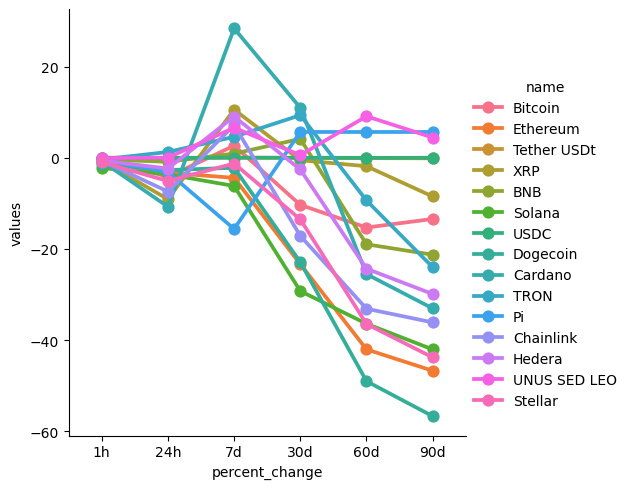

In [58]:
# Plot percentage changes
sns.catplot(data=df4, x='percent_change', y='values', hue='name', kind='point')

In [60]:
# Extract Bitcoin price trend over time
df5 = df[['name', 'quote.USD.price', 'timestamp']]
df5 = df5.query("name == 'Bitcoin'")
df5 = df5.reset_index()
df5.head()

,index,name,quote.USD.price,timestamp
0,0,Bitcoin,86450.88993,2025-03-08 01:41:13.781829
1,15,Bitcoin,86510.19011,2025-03-08 01:42:14.463175
2,30,Bitcoin,86502.54986,2025-03-08 01:43:16.106421
3,45,Bitcoin,86502.54986,2025-03-08 01:44:16.699715
4,60,Bitcoin,86535.02259,2025-03-08 01:45:17.304896


In [62]:
df5.dtypes

index                int64
name                object
quote.USD.price    float64
timestamp           object
dtype: object

In [64]:
# Convert timestamp to datetime format
df5['timestamp'] = pd.to_datetime(df5['timestamp'])
df5.dtypes

index                       int64
name                       object
quote.USD.price           float64
timestamp          datetime64[ns]
dtype: object

In [66]:
df5['timestamp'] = df5['timestamp'].dt.time
df5['timestamp'] = df5['timestamp'].astype(str)
df5['timestamp'] = [ timestmp.split('.')[0] for timestmp in  df5['timestamp']]
df5.head()

,index,name,quote.USD.price,timestamp
0,0,Bitcoin,86450.88993,01:41:13
1,15,Bitcoin,86510.19011,01:42:14
2,30,Bitcoin,86502.54986,01:43:16
3,45,Bitcoin,86502.54986,01:44:16
4,60,Bitcoin,86535.02259,01:45:17


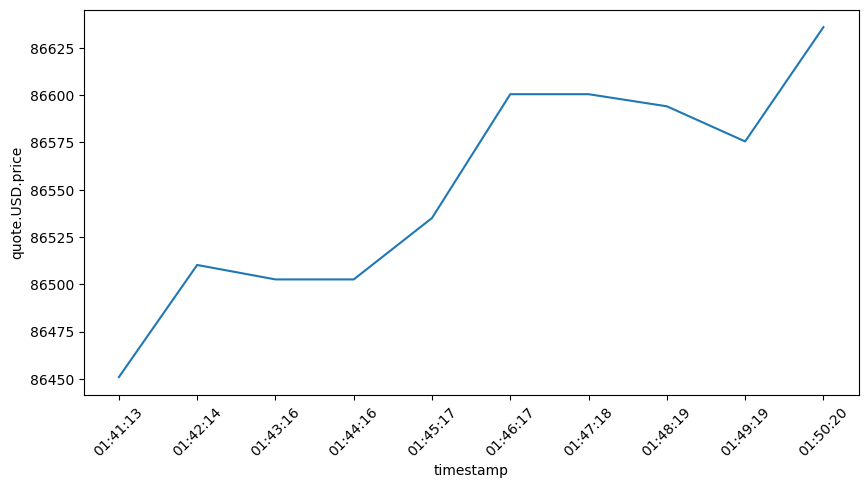

In [68]:
# Plot Bitcoin price trend
plt.figure(figsize=(10,5))
sns.lineplot(data=df5, x='timestamp', y='quote.USD.price')
plt.xticks(rotation=45)
plt.show()